# DATA VISUALIZATION

In [ ]:
import numpy as np 
import os
import pandas as pd 
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
df = pd.read_csv('./drive/MyDrive/dataset_sdn.csv')

df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [ ]:
df.head(80)  #printing just 80 rows

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,4043,161293091,0,10271.0,10271.0,0
76,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
77,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,4127,226233337,0,2587.0,2587.0,0
78,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
df.shape  #it will help us to get the rows and columns of dataset 

(104345, 23)

In [ ]:
df.info()   #it will give information of datatype of colums and columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [ ]:
count = df.label.value_counts()
count

0    63561
1    40784
Name: label, dtype: int64

<Axes: ylabel='count'>

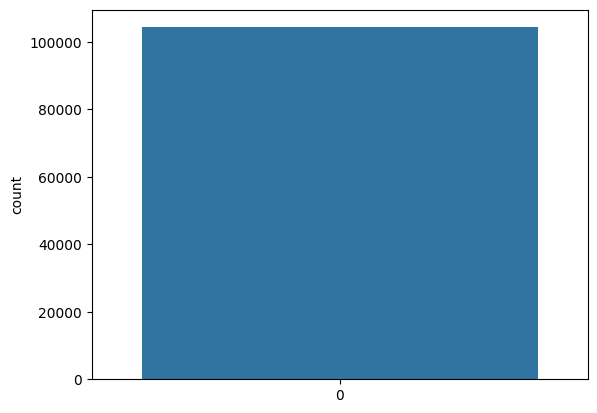

In [ ]:
sns.countplot(df.label)   #seaborn library used to plot how many malicious and non malicious traffic is there

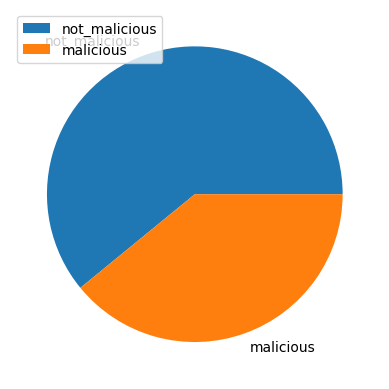

In [ ]:
#using matplotlib to plot the label column for pie chart

labels = ["not_malicious","malicious"]


size = [dict(df.label.value_counts())[0],dict(df.label.value_counts())[1]]

plt.pie(size,labels = labels)

plt.legend(["not_malicious", "malicious"])
plt.show()

In [ ]:
#checking the datatypes whether numeric or object

numeric_df = df.select_dtypes(include=['int64','float64'])
object_df = df.select_dtypes(include=['object'])

numeric_cols = numeric_df.columns
object_cols = object_df.columns

print("numeric_columns")
print(numeric_cols, '\n')

print("object_columns")
print(object_cols,'\n')




numeric_columns
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

object_columns
Index(['src', 'dst', 'Protocol'], dtype='object') 



Text(0.5, 1.0, 'Number of all reqests')

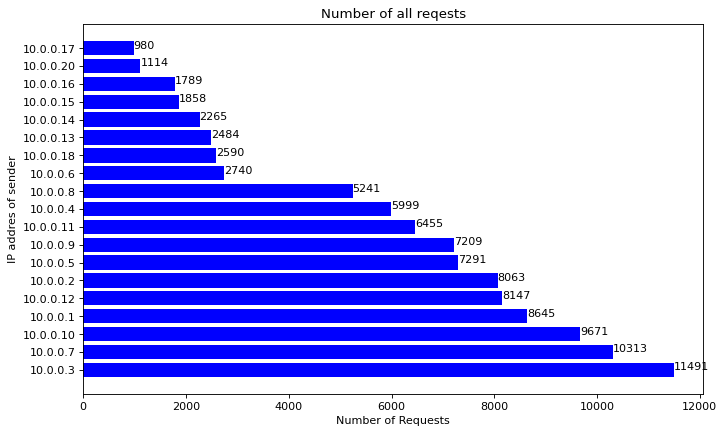

In [ ]:
figure(figsize=(10, 6), dpi=80)
plt.barh(list(dict(df.src.value_counts()).keys()), dict(df.src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(df.src.value_counts()).values()):
    plt.text(x = val, y = idx, s = int(val))

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

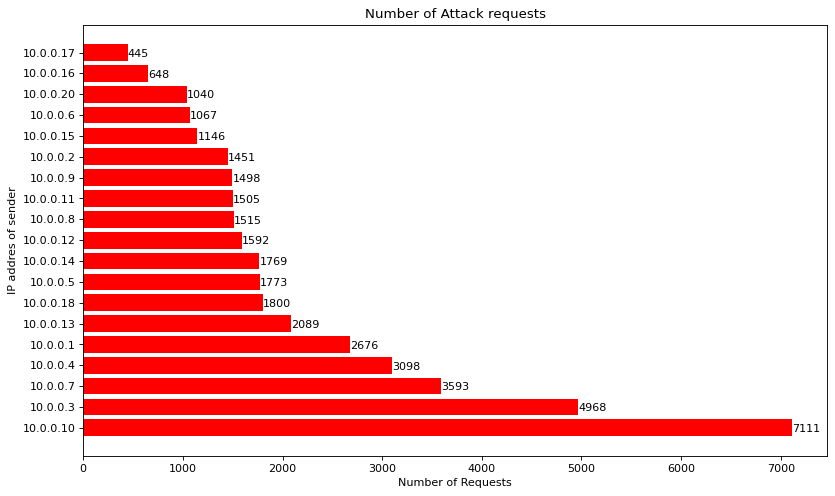

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(df[df.label == 1].src.value_counts()).keys()), dict(df[df.label == 1].src.value_counts()).values(), color='red')

for idx, val in enumerate(dict(df[df.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = int(val))

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

In [ ]:
df.duplicated().sum()

5091

In [ ]:
df =  df.drop_duplicates(keep="first")

In [ ]:
df.isnull().sum().sort_values(ascending = False)

tot_kbps       506
rx_kbps        506
dt               0
byteperflow      0
tx_kbps          0
rx_bytes         0
tx_bytes         0
port_no          0
Protocol         0
Pairflow         0
pktrate          0
pktperflow       0
switch           0
packetins        0
flows            0
tot_dur          0
dur_nsec         0
dur              0
bytecount        0
pktcount         0
dst              0
src              0
label            0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending = False)

tot_kbps       506
rx_kbps        506
dt               0
byteperflow      0
tx_kbps          0
rx_bytes         0
tx_bytes         0
port_no          0
Protocol         0
Pairflow         0
pktrate          0
pktperflow       0
switch           0
packetins        0
flows            0
tot_dur          0
dur_nsec         0
dur              0
bytecount        0
pktcount         0
dst              0
src              0
label            0
dtype: int64

In [ ]:
df=df.groupby('label').filter(lambda x:len(x)>10000)
df['label'].value_counts()

0    61248
1    38006
Name: label, dtype: int64

In [ ]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

<ipython-input-22-915cabbd043f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.75)
corr_features 

<ipython-input-23-84b92732dab5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{'byteperflow', 'pktrate', 'tot_dur', 'tot_kbps'}

In [ ]:
df.drop(corr_features,axis=1,inplace=True)

In [ ]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,flows,packetins,pktperflow,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,3,1943,13535,0,UDP,3,143928631,3917,0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2,1943,13531,0,UDP,4,3842,3520,0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,3,1943,13534,0,UDP,1,3795,1242,0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,3,1943,13534,0,UDP,2,3688,1492,0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,3,1943,13534,0,UDP,3,3413,3665,0,0.0,0


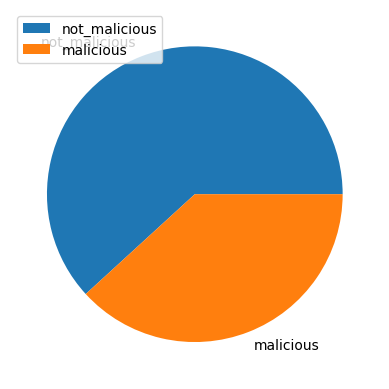

In [ ]:
labels = ["not_malicious","malicious"]

size = [dict(df['label'].value_counts())[0],dict(df['label'].value_counts())[1]]
plt.pie(size,labels = labels)

plt.legend(["not_malicious", "malicious"])
plt.show()

In [ ]:
x = df.drop(['label', 'src','dst','dt','Protocol','rx_kbps'],axis=1)
y = df['label']

In [ ]:
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)

In [ ]:
Xn.head()
Xn.shape

(75452, 13)

In [ ]:
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

start_time = time.perf_counter()
LR = LogisticRegression(max_iter=1000)

#train the model using the training the data
LR.fit(X_train,Y_train)
end_time = time.perf_counter()

#predict the classes of test data
y_pred = LR.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# compute F1 score
f1 = f1_score(Y_test, y_pred)
print('F1 score:', f1)

# compute precision
precision = precision_score(Y_test, y_pred)
print('Precision:', precision)

# compute recall
recall = recall_score(Y_test, y_pred)
print('Recall:', recall)

# compute classification report
report = classification_report(Y_test, y_pred)
print('Classification report:\n', report)

# compute confusion matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion matrix:\n', confusion)
print("accuracy achieved using logistic regression:",accuracy*100)

# Calculate the computation time
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.7162484537904223
F1 score: 0.7166115155526142
Precision: 0.722508896797153
Recall: 0.7108096280087527
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72     11211
           1       0.72      0.71      0.72     11425

    accuracy                           0.72     22636
   macro avg       0.72      0.72      0.72     22636
weighted avg       0.72      0.72      0.72     22636

Confusion matrix:
 [[8092 3119]
 [3304 8121]]
accuracy achieved using logistic regression: 71.62484537904223
Computation time: 0.1298299439999937 seconds


KNN(K-NEAREST NEIGHBOUR).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.perf_counter()
#now initializing KNN
KNN = KNeighborsClassifier(n_neighbors = 5)

#train the KNN model
KNN.fit(X_train,Y_train)
end_time = time.perf_counter()

#test the KNN model
y_pred = KNN.predict(X_test)


# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# compute F1 score
f1 = f1_score(Y_test, y_pred)
print('F1 score:', f1)

# compute precision
precision = precision_score(Y_test, y_pred)
print('Precision:', precision)

# compute recall
recall = recall_score(Y_test, y_pred)
print('Recall:', recall)

# compute classification report
report = classification_report(Y_test, y_pred)
print('Classification report:\n', report)

# compute confusion matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion matrix:\n', confusion)

# Calculate the computation time
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9587382929846262
F1 score: 0.9593418074177259
Precision: 0.9542738373603533
Recall: 0.9644638949671772
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     11211
           1       0.95      0.96      0.96     11425

    accuracy                           0.96     22636
   macro avg       0.96      0.96      0.96     22636
weighted avg       0.96      0.96      0.96     22636

Confusion matrix:
 [[10683   528]
 [  406 11019]]
Computation time: 0.1391944840000292 seconds


In [ ]:
# from sklearn.svm import SVC

# # splitting the dataset
# x = df.drop(['label','src','dst','dt','Protocol','rx_kbps','tot_kbps'], axis=1)
# y = df['label']

# # split the dataset into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # feature scaling 
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# # creating an SVM object
# svm = SVC(kernel='linear')

# # train the model using the training data
# svm.fit(x_train, y_train)

# # predict the classes of test data
# y_pred = svm.predict(x_test)

# # calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy achieved using SVM classification:", accuracy*100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.perf_counter()
rf = RandomForestClassifier(random_state=42)

# train the model using the training data
rf.fit(X_train, Y_train)
end_time = time.perf_counter()

# predict the classes of test data
y_pred = rf.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# compute F1 score
f1 = f1_score(Y_test, y_pred)
print('F1 score:', f1)

# compute precision
precision = precision_score(Y_test, y_pred)
print('Precision:', precision)

# compute recall
recall = recall_score(Y_test, y_pred)
print('Recall:', recall)

# compute classification report
report = classification_report(Y_test, y_pred)
print('Classification report:\n', report)

# compute confusion matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion matrix:\n', confusion)

# Calculate the computation time
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9996907580844672
F1 score: 0.9996937212863706
Precision: 0.9994750656167979
Recall: 0.9999124726477024
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11211
           1       1.00      1.00      1.00     11425

    accuracy                           1.00     22636
   macro avg       1.00      1.00      1.00     22636
weighted avg       1.00      1.00      1.00     22636

Confusion matrix:
 [[11205     6]
 [    1 11424]]
Computation time: 6.868170804000044 seconds


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

start_time = time.perf_counter()
dt = DecisionTreeClassifier(random_state=42)

# train the model using the training data
dt.fit(X_train, Y_train)
end_time = time.perf_counter()

# predict the classes of test data
y_pred = dt.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# compute F1 score
f1 = f1_score(Y_test, y_pred)
print('F1 score:', f1)

# compute precision
precision = precision_score(Y_test, y_pred)
print('Precision:', precision)

# compute recall
recall = recall_score(Y_test, y_pred)
print('Recall:', recall)

# compute classification report
report = classification_report(Y_test, y_pred)
print('Classification report:\n', report)

# compute confusion matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion matrix:\n', confusion)

# Calculate the computation time
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.999867467750486
F1 score: 0.999868726206625
Precision: 0.9997374868743437
Recall: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11211
           1       1.00      1.00      1.00     11425

    accuracy                           1.00     22636
   macro avg       1.00      1.00      1.00     22636
weighted avg       1.00      1.00      1.00     22636

Confusion matrix:
 [[11208     3]
 [    0 11425]]
Computation time: 0.3041861700000368 seconds


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.perf_counter()
# create a Gradient Boosting Classifier object
gb = GradientBoostingClassifier(random_state=42)

# train the model using the training data
gb.fit(X_train, Y_train)
end_time = time.perf_counter()

# predict the classes of test data
y_pred = gb.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

# compute F1 score
f1 = f1_score(Y_test, y_pred)
print('F1 score:', f1)

# compute precision
precision = precision_score(Y_test, y_pred)
print('Precision:', precision)

# compute recall
recall = recall_score(Y_test, y_pred)
print('Recall:', recall)

# compute classification report
report = classification_report(Y_test, y_pred)
print('Classification report:\n', report)

# compute confusion matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion matrix:\n', confusion)

# Calculate the computation time
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.989839194203923
F1 score: 0.9900121591106479
Precision: 0.9824183400844609
Recall: 0.9977242888402625
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     11211
           1       0.98      1.00      0.99     11425

    accuracy                           0.99     22636
   macro avg       0.99      0.99      0.99     22636
weighted avg       0.99      0.99      0.99     22636

Confusion matrix:
 [[11007   204]
 [   26 11399]]
Computation time: 19.16555093400001 seconds


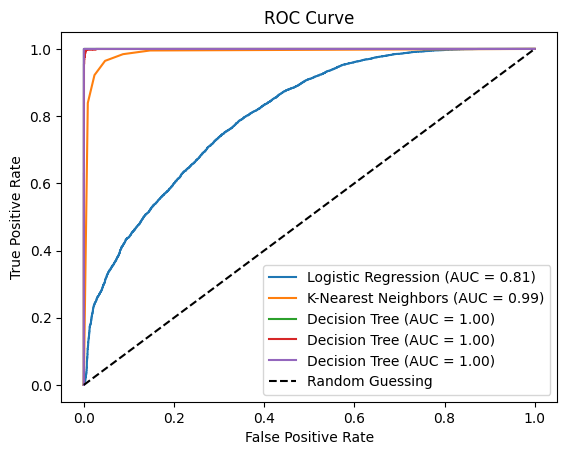

In [ ]:
# Plot the AUC curve
lr_prob = LR.predict_proba(X_test)[:, 1]
knn_prob = KNN.predict_proba(X_test)[:, 1]
dt_prob = dt.predict_proba(X_test)[:, 1]
gb_prob = gb.predict_proba(X_test)[:, 1]
rf_prob = rf.predict_proba(X_test)[:, 1]

lr_fpr, lr_tpr, thresholds0 = roc_curve(Y_test, lr_prob)
knn_fpr, knn_tpr, thresholds1 = roc_curve(Y_test, knn_prob)
dt_fpr, dt_tpr, thresholds2 = roc_curve(Y_test, dt_prob)
gb_fpr, gb_tpr, thresholds3 = roc_curve(Y_test, gb_prob)
rf_fpr, rf_tpr, thresholds4 = roc_curve(Y_test, rf_prob)

# calculate ROC AUC score
lr_auc = roc_auc_score(Y_test, lr_prob)
knn_auc = roc_auc_score(Y_test, knn_prob)
dt_auc = roc_auc_score(Y_test, gb_prob)
gb_auc = roc_auc_score(Y_test, rf_prob)
rf_auc = roc_auc_score(Y_test, dt_prob)


# plot ROC curves
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot(knn_fpr, knn_tpr, label=f"K-Nearest Neighbors (AUC = {knn_auc:.2f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot(gb_fpr, gb_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()